In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json
import datetime
import collections
matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
matplotlib.rc('font',family='AppleMyungjo')

In [3]:
with open('heart/2017-03-12') as f:
    sample_data = json.loads(f.read())
list(sample_data.keys())

['activities-heart-intraday', 'activities-heart']

In [4]:
list(sample_data['activities-heart-intraday'].keys())

['datasetInterval', 'datasetType', 'dataset']

In [5]:
list(sample_data['activities-heart'][0].keys())

['value', 'dateTime']

In [6]:
sample_data['activities-heart']

[{'dateTime': '2017-03-12',
  'value': {'customHeartRateZones': [],
   'heartRateZones': [{'caloriesOut': 1692.71818,
     'max': 98,
     'min': 30,
     'minutes': 945,
     'name': 'Out of Range'},
    {'caloriesOut': 523.87708,
     'max': 137,
     'min': 98,
     'minutes': 80,
     'name': 'Fat Burn'},
    {'caloriesOut': 29.64699,
     'max': 166,
     'min': 137,
     'minutes': 3,
     'name': 'Cardio'},
    {'caloriesOut': 0, 'max': 220, 'min': 166, 'minutes': 0, 'name': 'Peak'}],
   'restingHeartRate': 65}}]

In [7]:
dates = pd.date_range('2017-03-12','2017-03-26')
times = pd.timedelta_range('00:00:00','23:59:59')

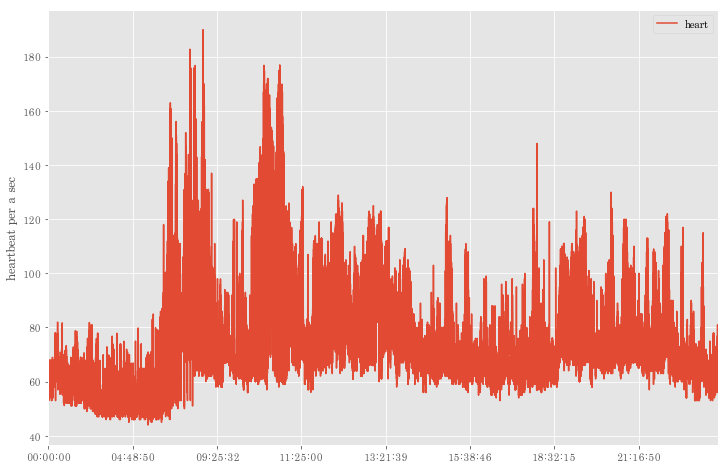

In [10]:
days = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
dir_name = './heart/'
time_heart = {}
heart_days = {0:0,1:0,2:0,3:0,4:0,5:0,6:0} #요일별 평균심장 박동수
days_count = {0:0,1:0,2:0,3:0,4:0,5:0,6:0} #요일별 데이터 개수
for date in dates:
    fname = dir_name+str(date.year)+'-'+str(date.month).zfill(2)+'-'+str(date.day).zfill(2)
    with open(fname) as f:
        date_data = json.loads(f.read())
        i=1
        intra_data = 1
        for intraday in date_data['activities-heart-intraday']['dataset']:
            if(int(intraday['value'])==0):
                continue
            if intraday['time'] not in time_heart.keys():
                time_heart[intraday['time']] = int(intraday['value'])
            else:
                time_heart[intraday['time']] = (time_heart[intraday['time']] * (i-1) +int(intraday['value'])) / i
            i=i+1
            intra_data = int(intraday['value']) 
        heart_days[date.dayofweek] = (heart_days[date.dayofweek] * days_count[date.dayofweek] + int(intraday['value']) ) / ( days_count[date.dayofweek] + 1 )
        days_count[date.dayofweek] = days_count[date.dayofweek] + 1
heart_time_od  = collections.OrderedDict(sorted(time_heart.items()))
df = pd.DataFrame(list(heart_time_od.values()),index=list(heart_time_od.keys()))
df.columns=['heart']
df.plot()
plt.ylabel('heartbeat per a sec')

In [11]:
df.mean()

heart    72.992885
dtype: float64

In [12]:
heart_days_od  = collections.OrderedDict(sorted(heart_days.items()))

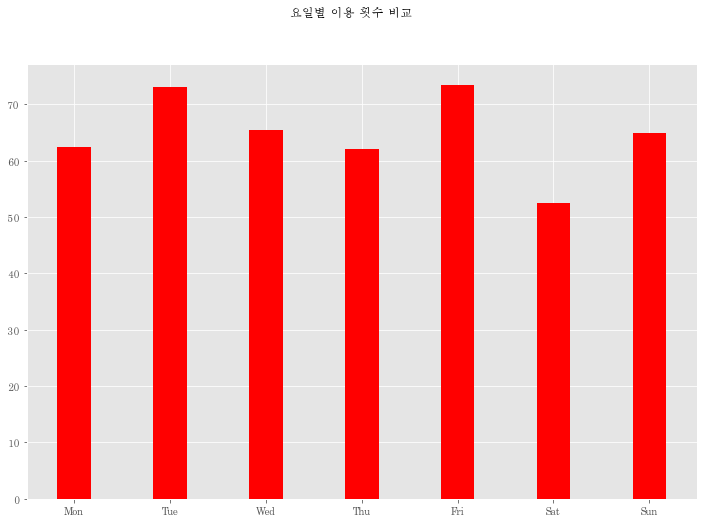

In [13]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
fig, ax = plt.subplots()
fig.suptitle('요일별 이용 횟수 비교')
ind = list(heart_days_od.keys())
width = 0.35
rects1 = ax.bar(ind, list(heart_days_od.values()), width, color='r')
ax.set_xticks(ind)
ax.set_xticklabels(days)
plt.show()